seasonality

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

prices = np.loadtxt("prices.txt")
prices = prices.T

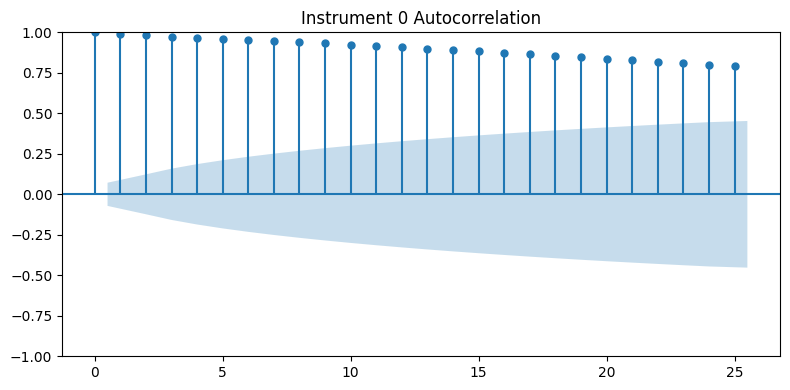

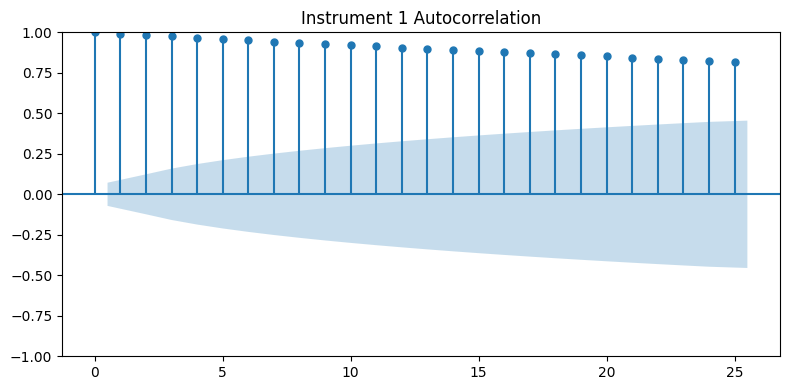

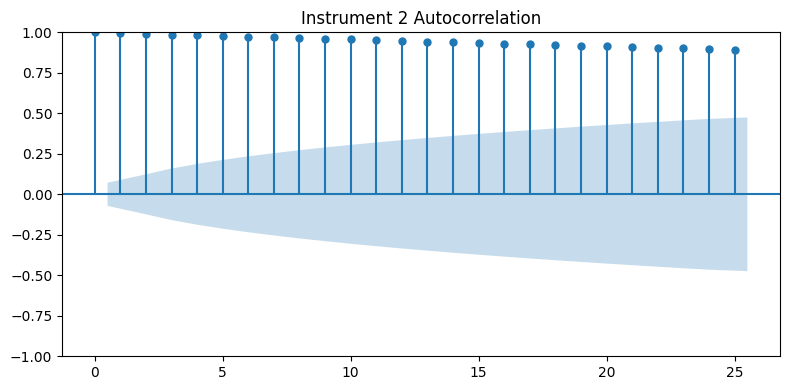

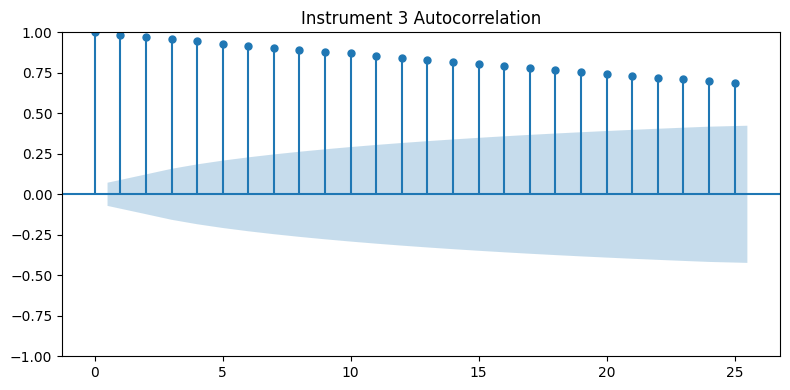

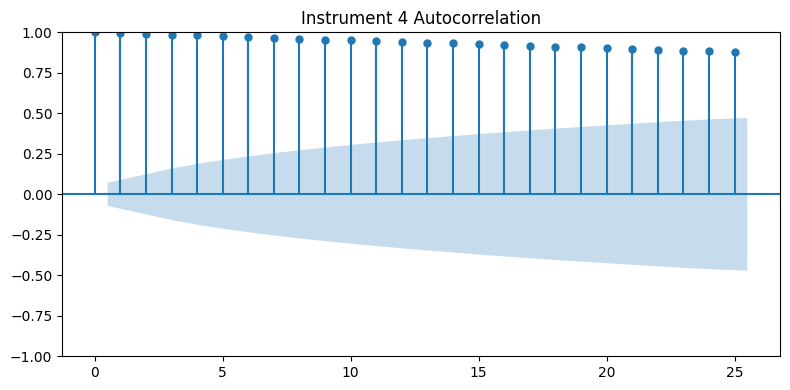

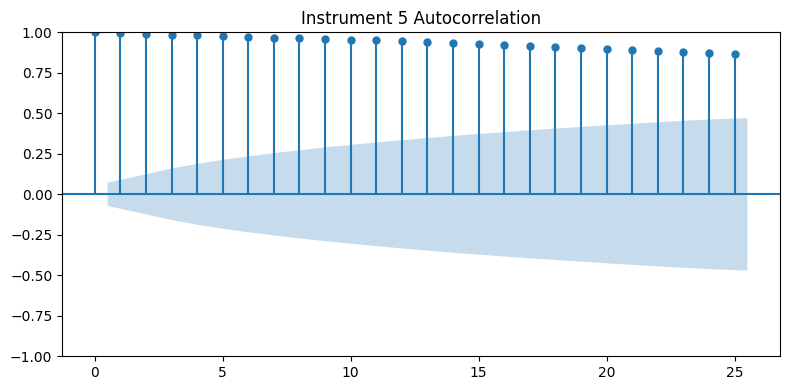

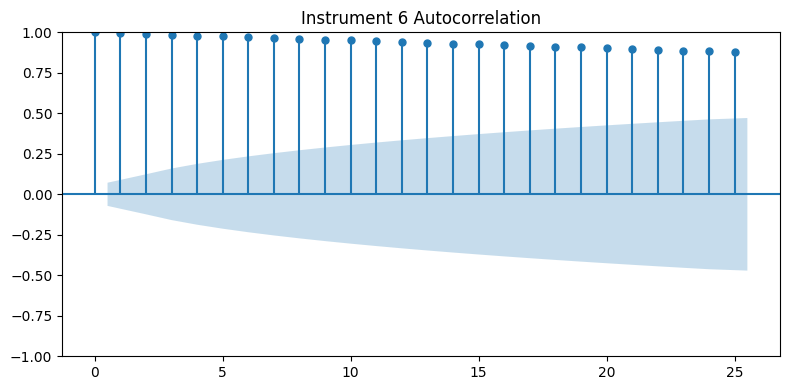

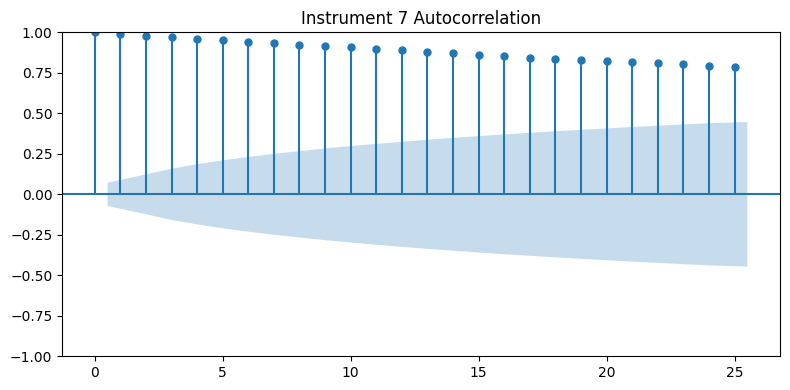

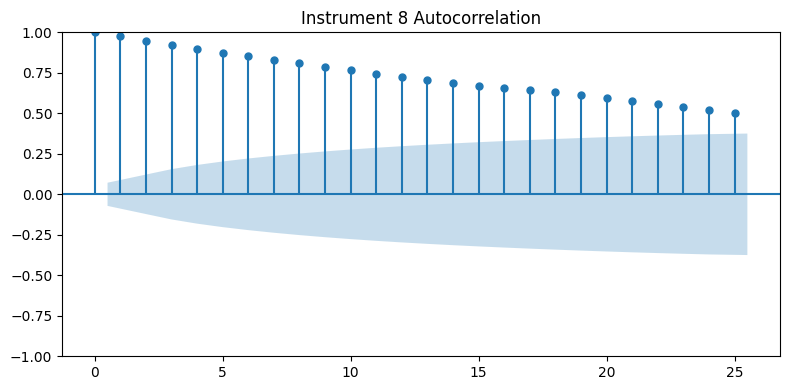

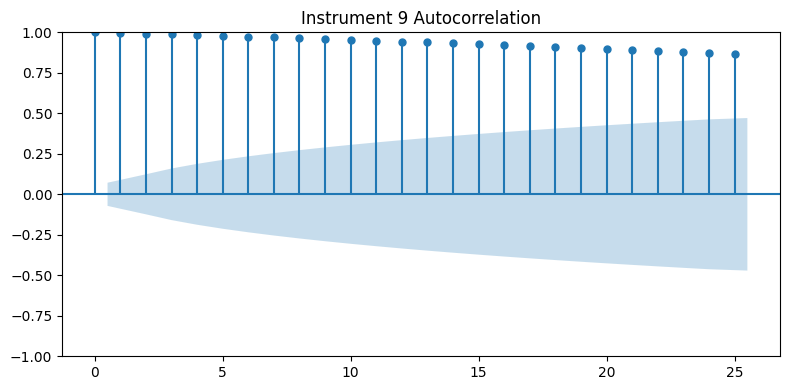

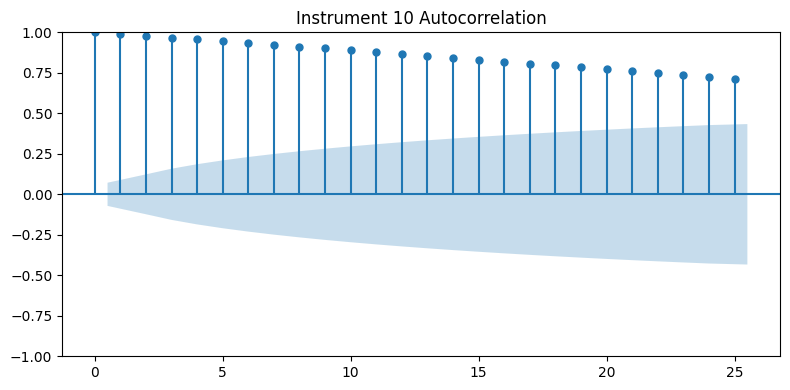

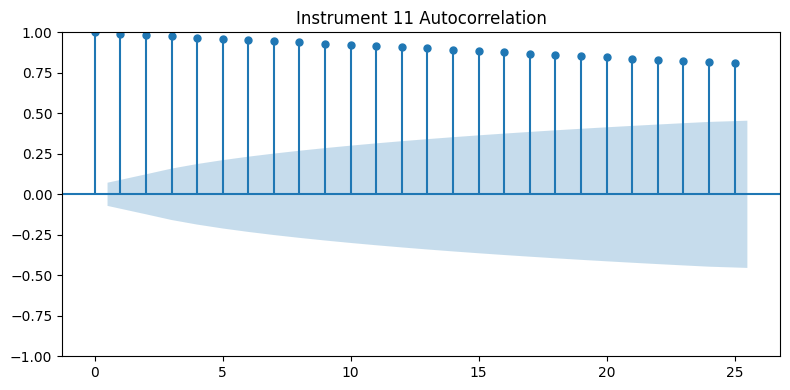

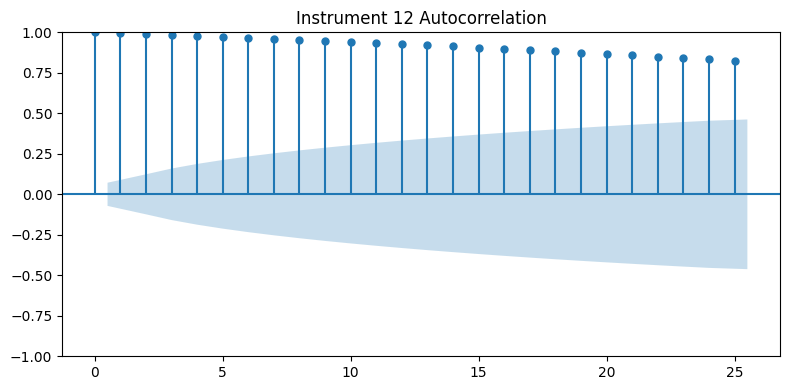

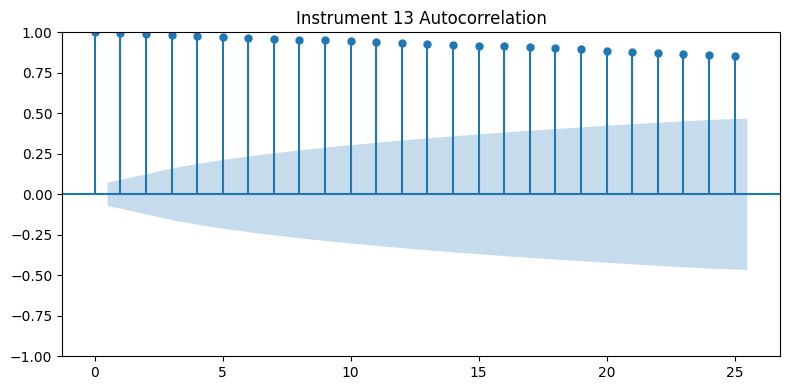

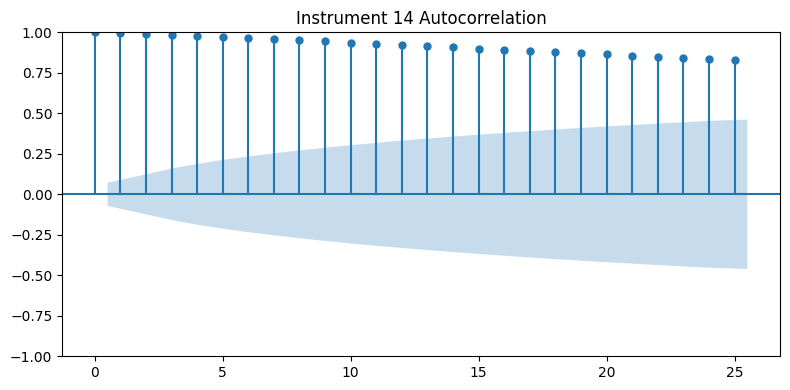

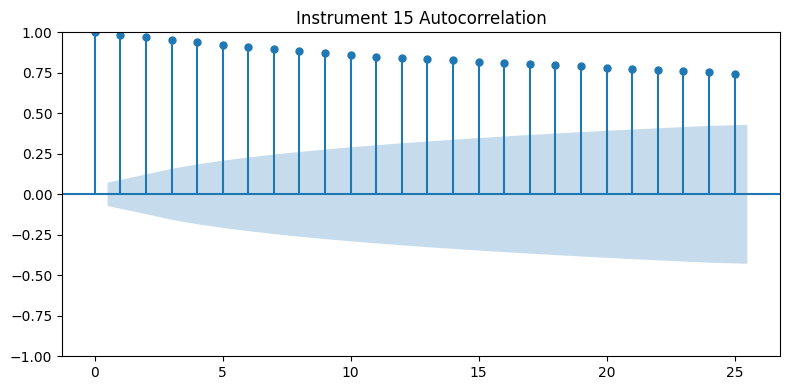

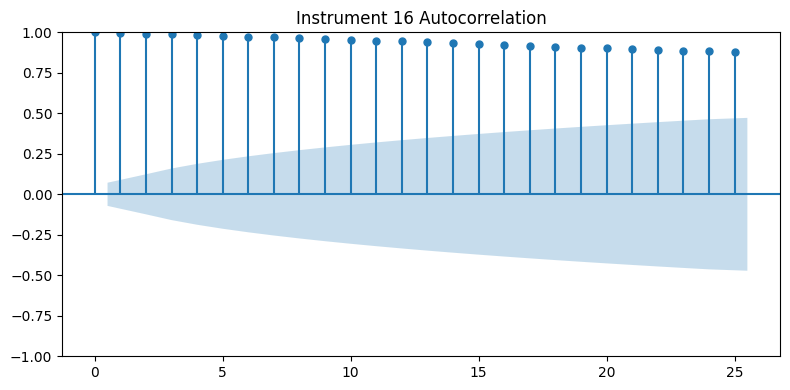

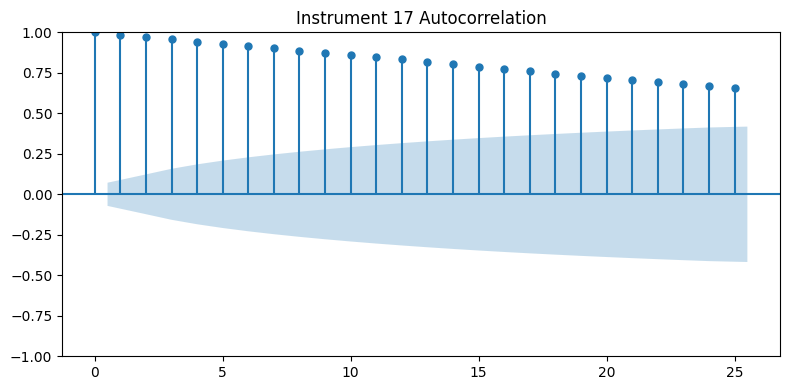

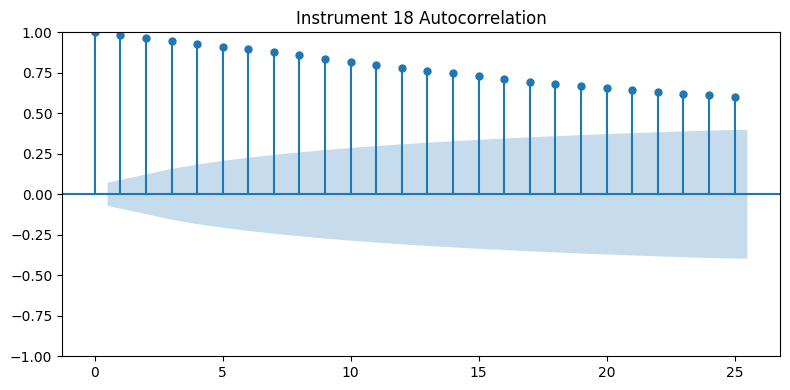

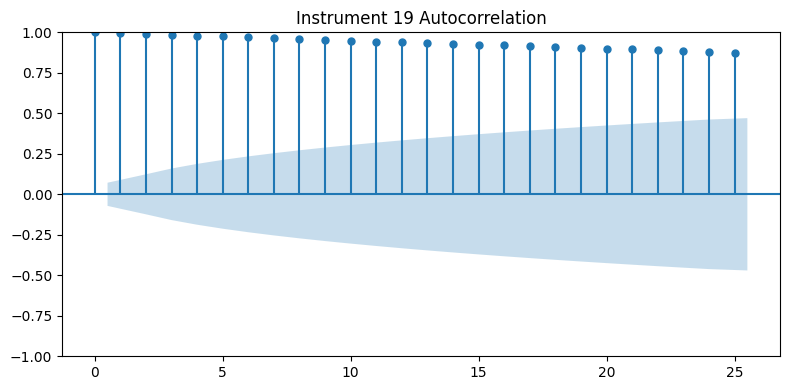

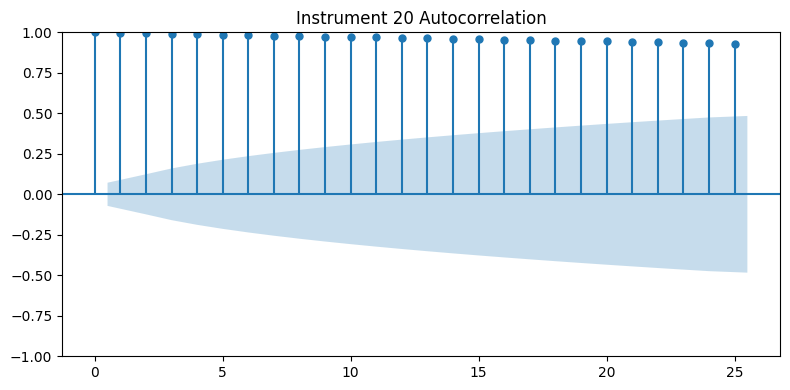

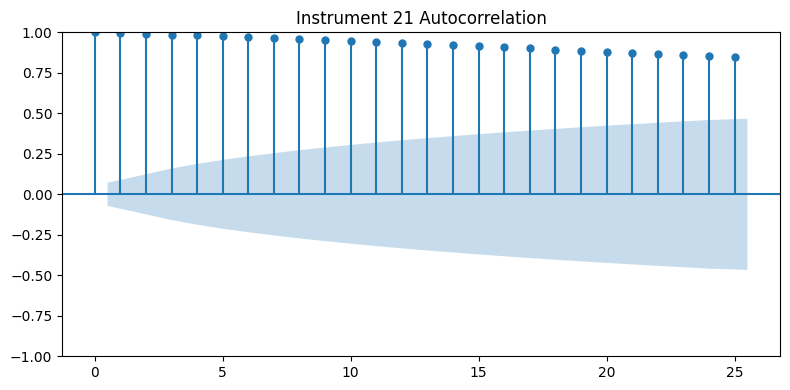

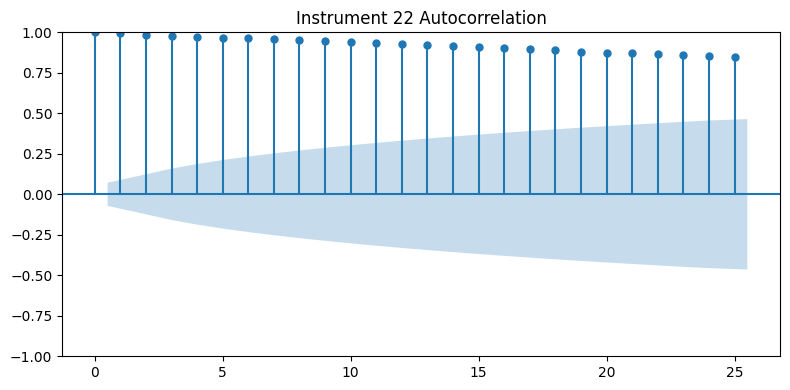

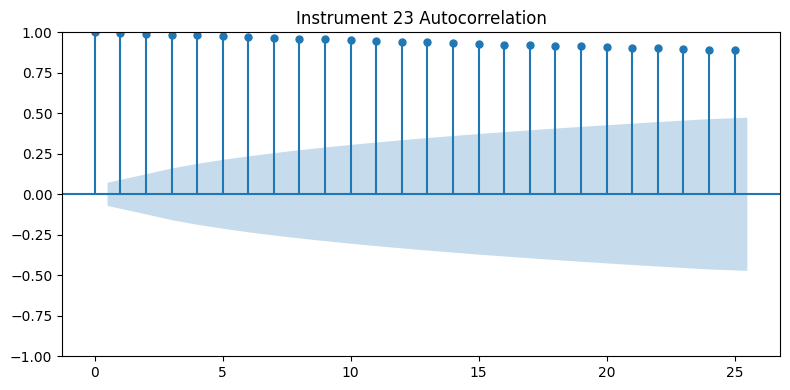

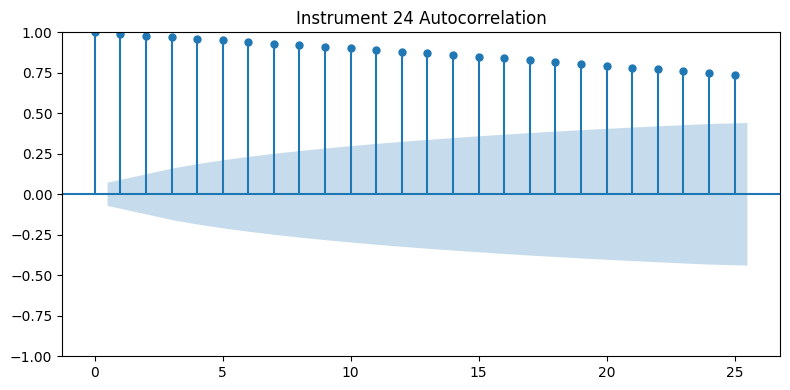

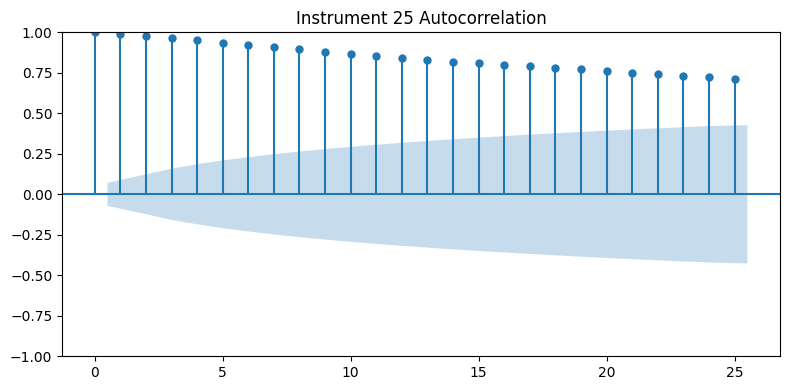

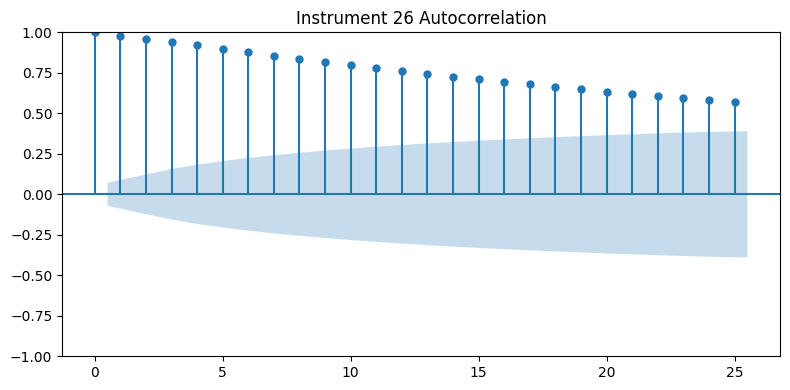

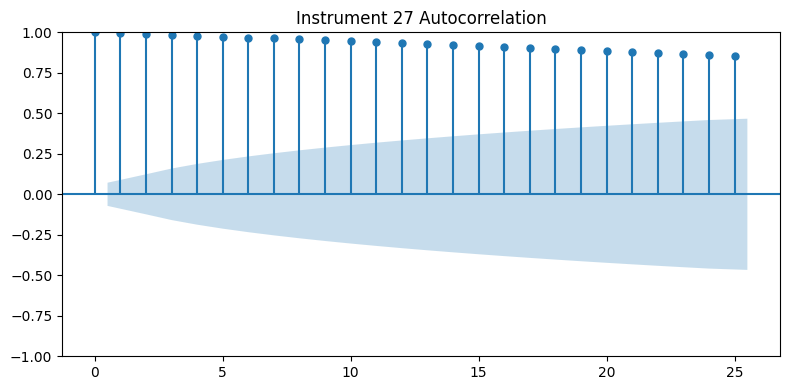

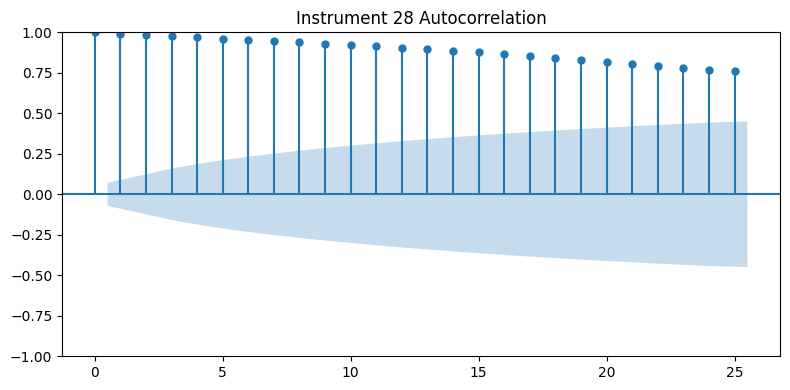

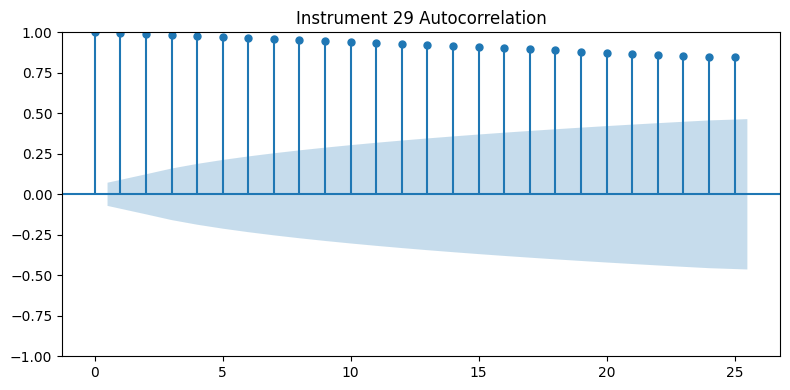

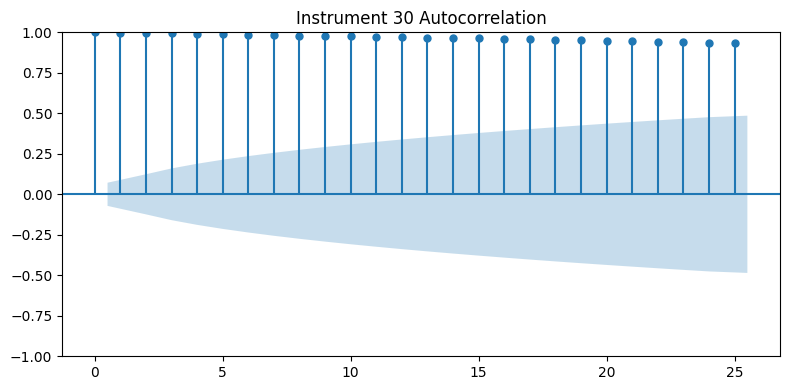

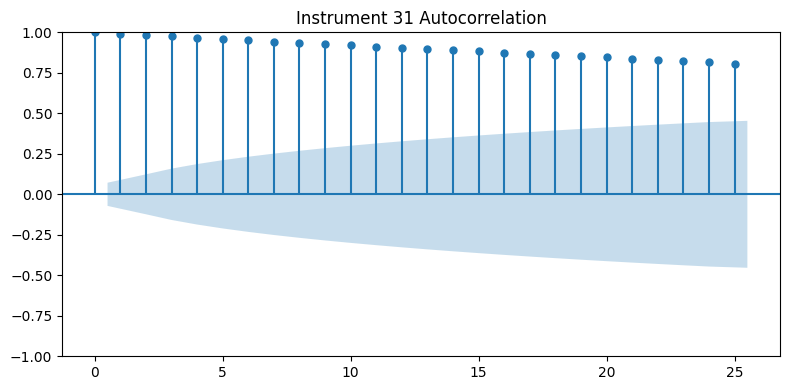

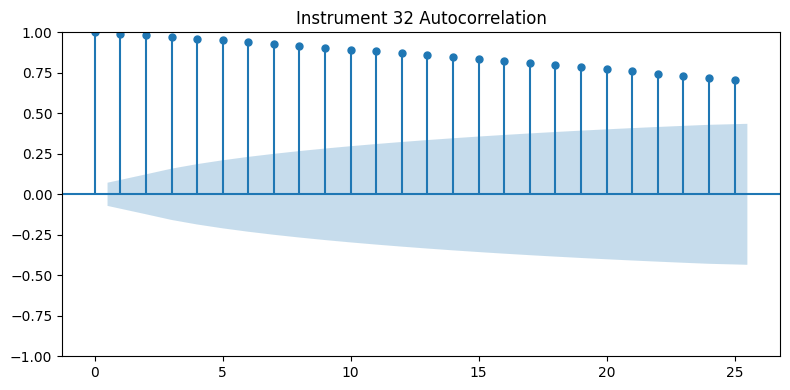

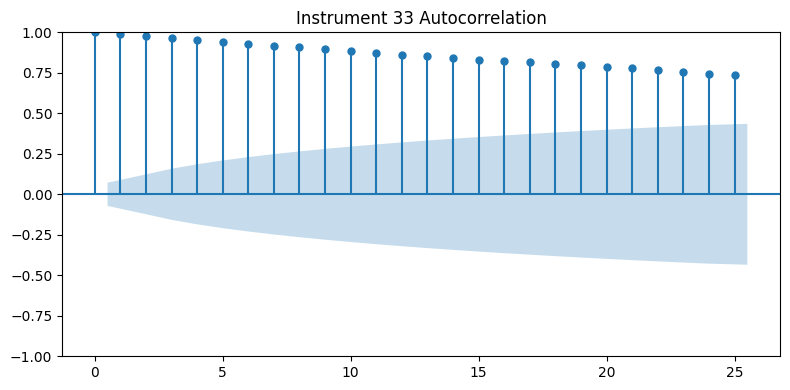

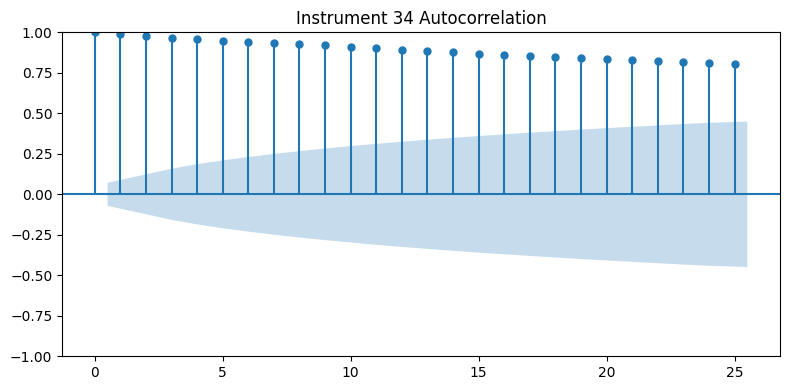

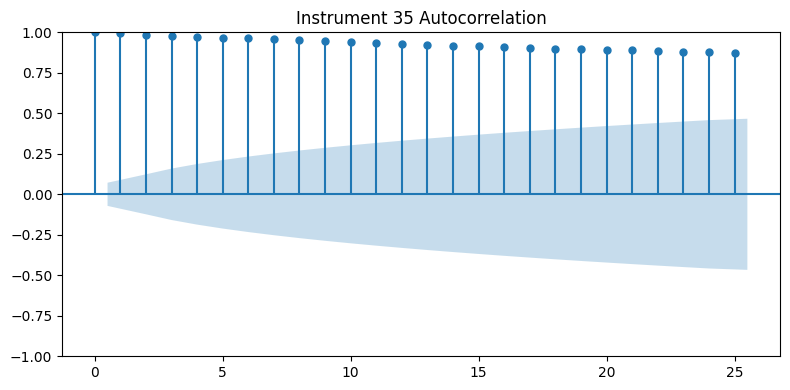

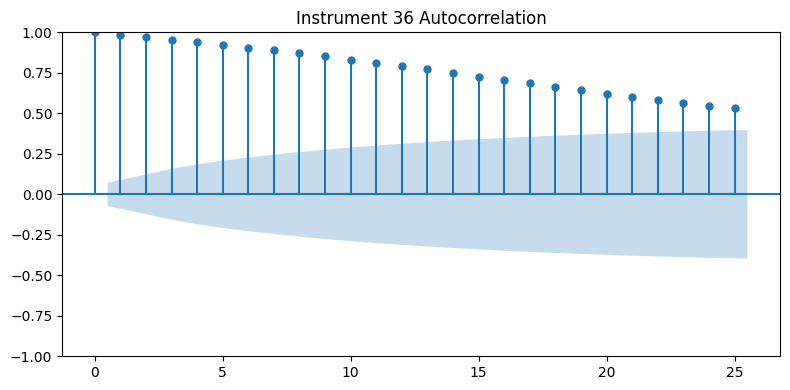

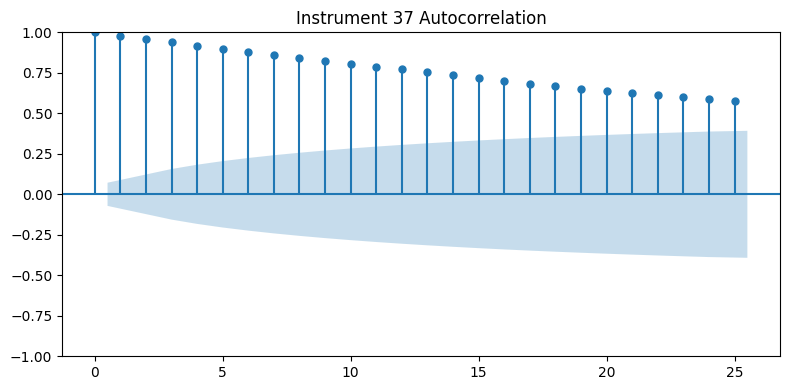

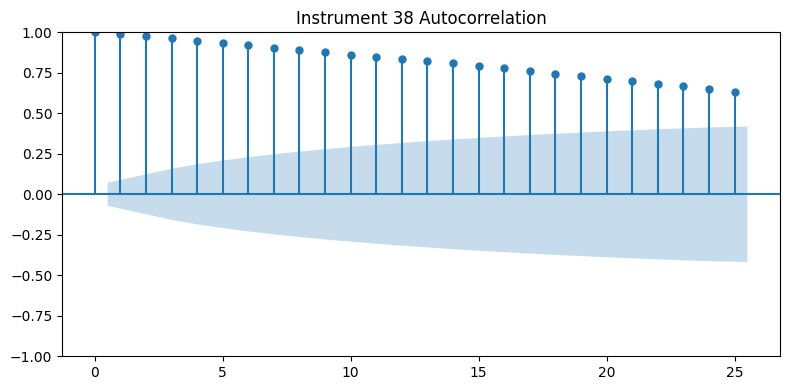

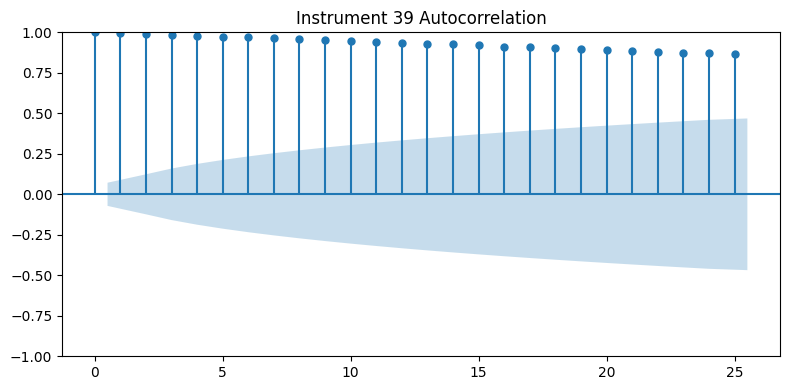

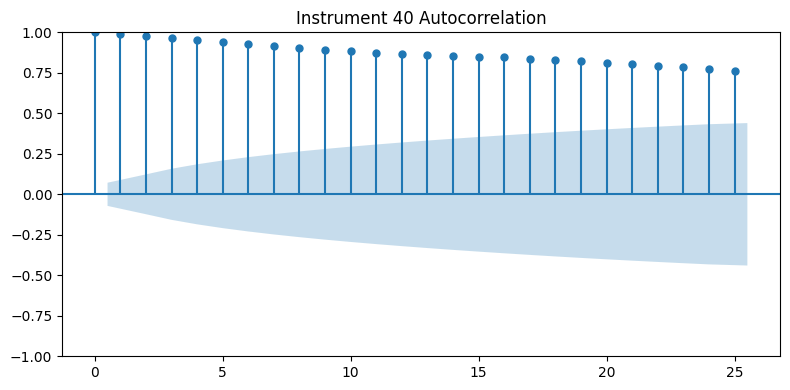

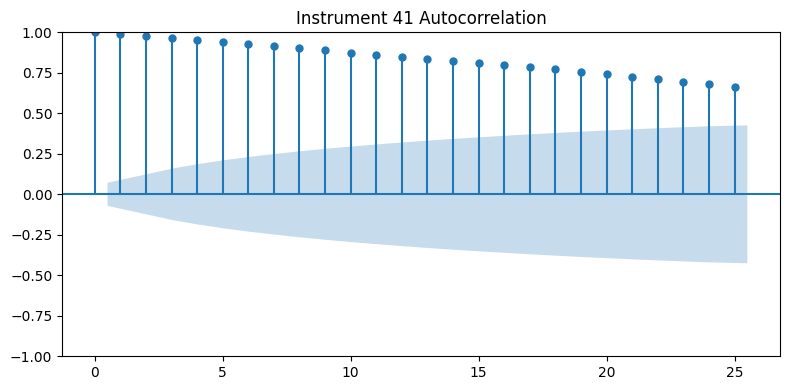

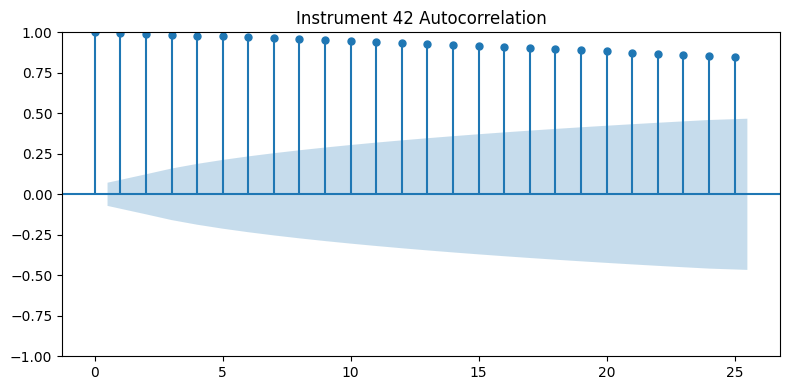

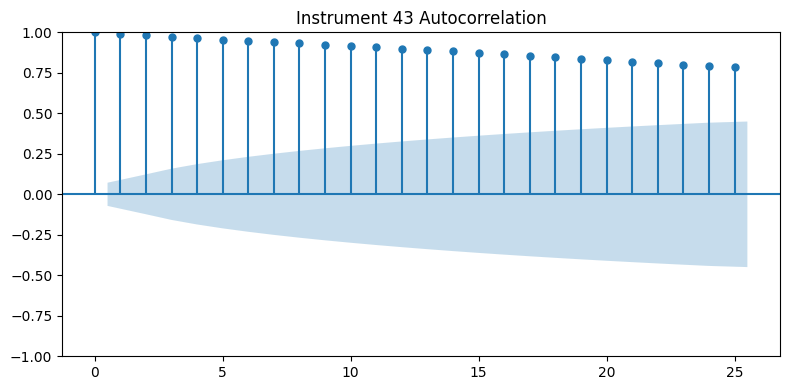

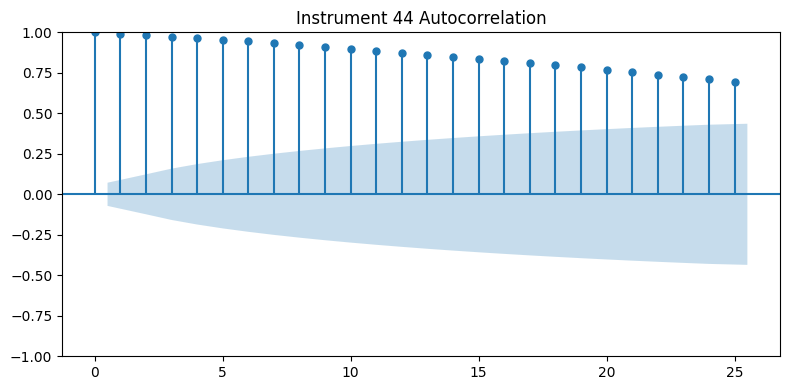

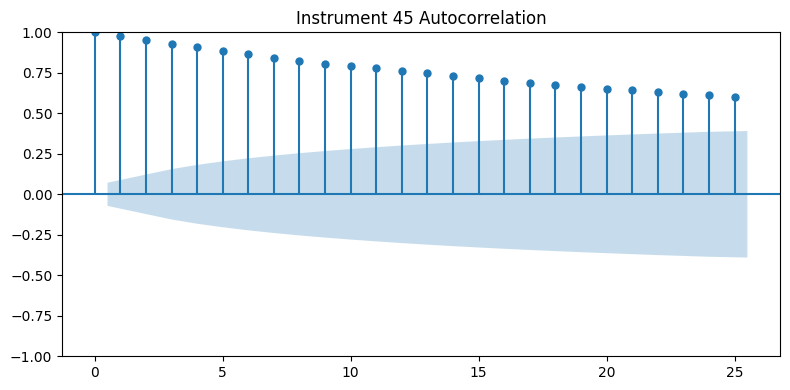

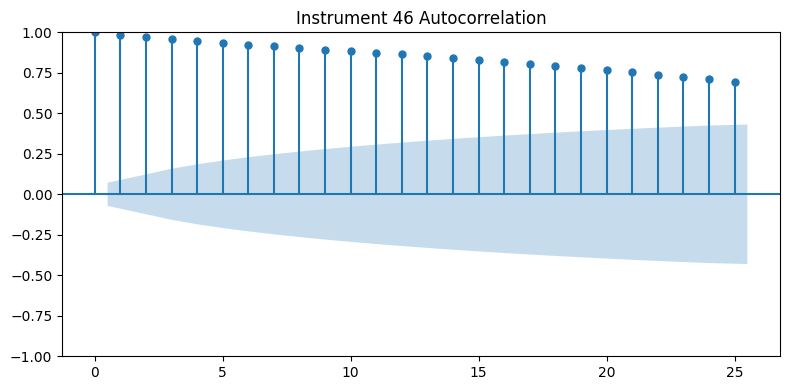

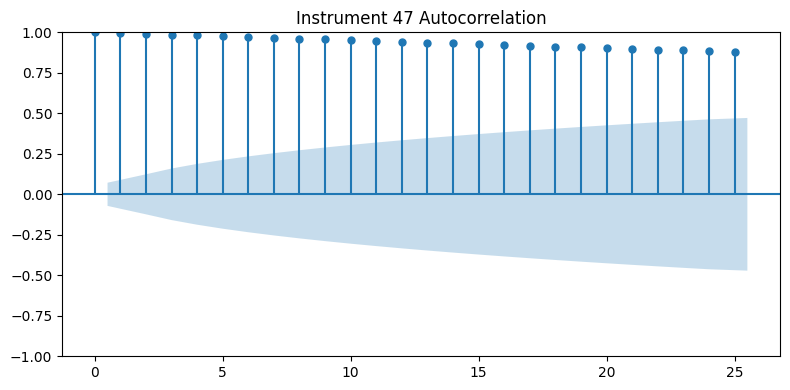

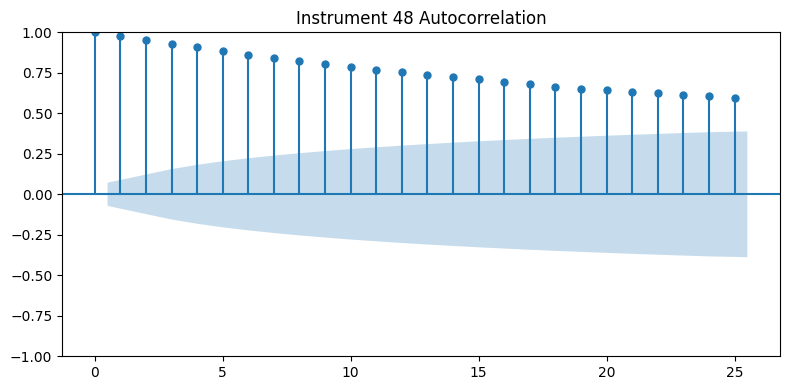

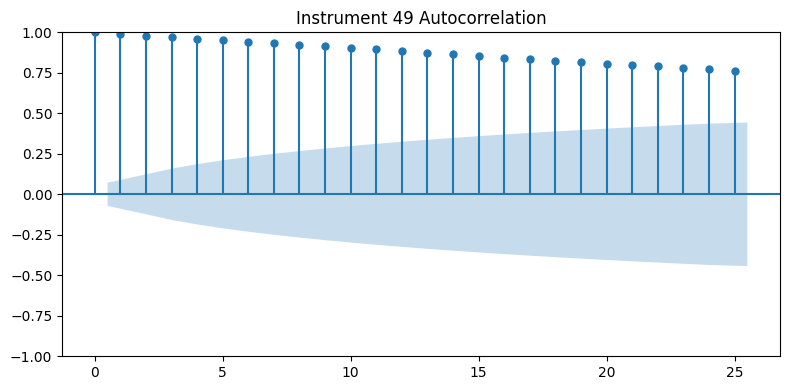

In [5]:
from statsmodels.graphics.tsaplots import plot_acf

seasonal_indices = []

for i, y in enumerate(prices):
    fig, ax = plt.subplots(figsize=(8, 4))
    plot_acf(y, lags=25, ax=ax, title=f'Instrument {i} Autocorrelation')
    plt.tight_layout()
    plt.show()

    acf_vals = pd.Series(np.correlate(y - np.mean(y), y - np.mean(y), mode='full')) / np.var(y) / len(y)
    acf_peaks = np.where(acf_vals[len(y):] > 0.5)[0]
    if len(acf_peaks) > 1:
        seasonal_indices.append(i)

